Data shape: (59, 2048, 2048, 1)
Data shape: (59, 2048, 2048, 2)


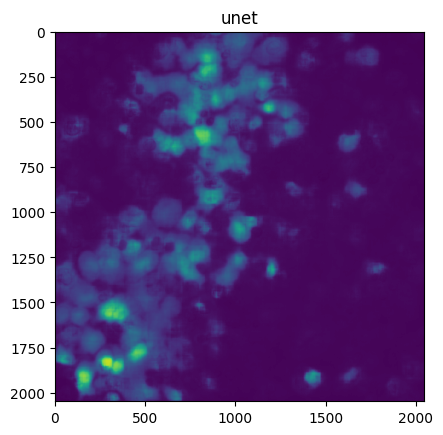

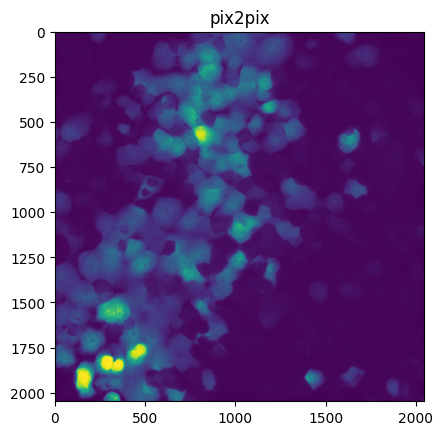

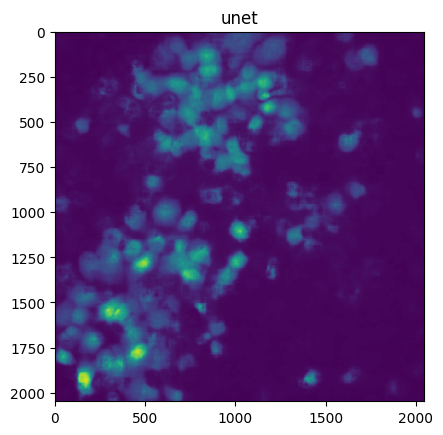

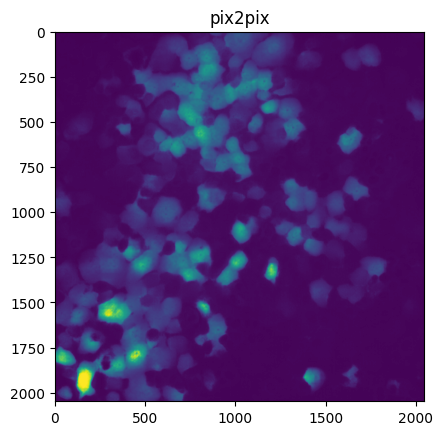

In [7]:
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from virvs.architectures.pix2pix import Generator
from virvs.data.npy_dataloader import NpyDataloader

tf.keras.utils.set_random_seed(42)


BASE_PATH = "/home/wyrzyk93/VIRVS/outputs/weights/"
DATASETS = {
    "hadv_2ch": "/bigdata/casus/MLID/maria/VIRVS_data/HADV/processed/test",
    "hadv_1ch": "/bigdata/casus/MLID/maria/VIRVS_data/HADV/processed/test",
    "vacv": "/bigdata/casus/MLID/maria/VIRVS_data/VACV/processed/test",
    "iav": "/bigdata/casus/MLID/maria/VIRVS_data/IAV/processed/test",
    "hsv": "/bigdata/casus/MLID/maria/VIRVS_data/HSV/processed/test",
    "rv": "/bigdata/casus/MLID/maria/VIRVS_data/RV/processed/test",
}

WEIGHTS = {
    "pix2pix": {
        "hadv_2ch": "model_100000_316674a2-4299-4a06-b601-5e20f7dd02a6.h5",
        "hadv_1ch": "model_100000_d6792b38-8091-448d-a26a-ef08375b8dbe.h5",
        "vacv": "model_100000_138fd26a-88b9-4d2a-9f96-6a2ffe991364.h5",
        "iav": "model_100000_ef994584-7730-41b9-9a56-75d478bacf02.h5",
        "hsv": "model_100000_52d604f6-25fe-4d42-a212-cef281e3a8b5.h5",
        "rv": "model_100000_a6bd97a2-d889-40a4-a8ec-5c8816797f9d.h5",
    },
    "unet": {
        "hadv_2ch": "model_100000_c0175f01-1e6e-4bec-9f2e-2e5542c16584.h5",
        "hadv_1ch": "model_100000_47b9346c-e143-4bf7-9dce-40aa6f2329e5.h5",
        "vacv": "model_100000_4f91526f-a1b4-4057-926e-073f4ffbef67.h5",
        "iav": "model_100000_26c5b8b9-0c35-4fee-9eac-44a857cebe76.h5",
        "hsv": "model_100000_1b8e6e99-10fa-4221-b53a-b680a65826be.h5",
        "rv": "model_100000_0ca537f4-cbd8-4722-89cb-bdd43107a66b.h5",
    },
}

for virus in ["hadv_1ch", "hadv_2ch"]:

    if "vacv" == virus:
        size = 5888
    else:
        size = 2048

    if "2ch" in virus:
        ch_in = [0, 1]
    else:
        ch_in = [0]
    if "hadv" in virus:
        i = 22
    elif "iav" in virus:
        i = 1
    else:
        i = 0
        
    dataloader = NpyDataloader(
        path=DATASETS[virus],
        im_size=size,
        random_jitter=False,
        crop_type="center",
        ch_in=ch_in,
    )

    x, y = dataloader[i]
 
#     plt.imshow(np.squeeze(y), vmin=-1, vmax=1)
#     plt.figure()

#     plt.imshow(np.squeeze(x[..., 0]), vmin=-1, vmax=1)
#     plt.figure()        
    
    for model in ["unet", "pix2pix"]:
        if model == "unet":
            dropout = False
        else:
            dropout = True
        generator = Generator(size, ch_in=ch_in, ch_out=1, apply_dropout=dropout)
        generator.load_weights(f"{BASE_PATH}/{WEIGHTS[model][virus]}")
        output = np.squeeze(generator(np.expand_dims(x, 0), training=True), 0)
        
        plt.figure()
        plt.imshow(np.squeeze(output), vmin=-1, vmax=1)
        plt.title(model)
        
        # plt.figure()
        # plt.axis('off')  # Turn off axes
        # plt.title("")  # Clear title
        # plt.imsave(f"{virus}_{model}_prediction.svg", np.squeeze(output), vmin=-1, vmax=1)

Data shape: (90, 2048, 2048, 1)
Data shape: (77, 2048, 2048, 1)
Data shape: (96, 2160, 2160, 1)


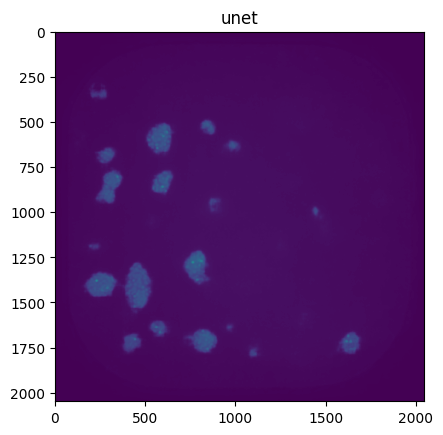

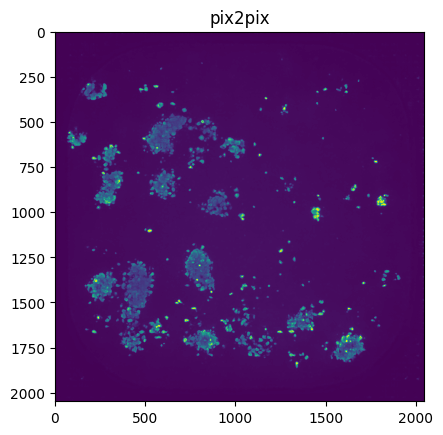

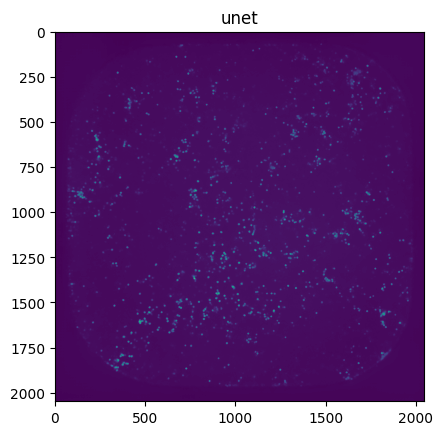

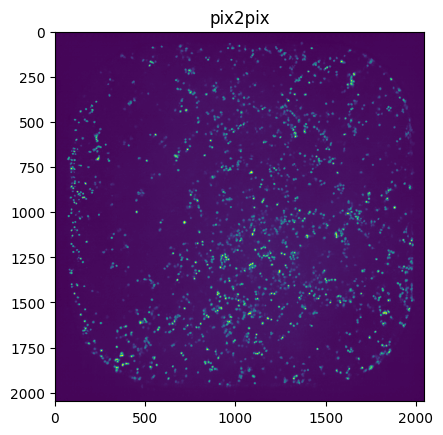

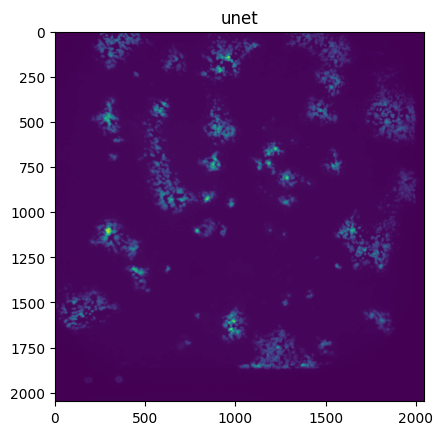

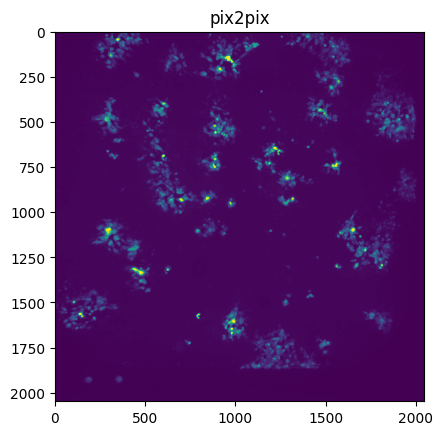

In [8]:
for virus in ["iav", "rv", "hsv"]:

    if "vacv" == virus:
        size = 5888
    else:
        size = 2048

    if "2ch" in virus:
        ch_in = [0, 1]
    else:
        ch_in = [0]
    if "hadv" in virus:
        i = 22
    elif "iav" in virus:
        i = 1
    else:
        i = 0
        
    dataloader = NpyDataloader(
        path=DATASETS[virus],
        im_size=size,
        random_jitter=False,
        crop_type="center",
        ch_in=ch_in,
    )

    x, y = dataloader[i]
 
#     plt.imshow(np.squeeze(y), vmin=-1, vmax=1)
#     plt.figure()

#     plt.imshow(np.squeeze(x[..., 0]), vmin=-1, vmax=1)
#     plt.figure()        
    
    for model in ["unet", "pix2pix"]:
        if model == "unet":
            dropout = False
        else:
            dropout = True
        generator = Generator(size, ch_in=ch_in, ch_out=1, apply_dropout=dropout)
        generator.load_weights(f"{BASE_PATH}/{WEIGHTS[model][virus]}")
        output = np.squeeze(generator(np.expand_dims(x, 0), training=True), 0)
        
        plt.figure()
        plt.imshow(np.squeeze(output), vmin=-1, vmax=1)
        plt.title(model)
        
        # plt.figure()
        # plt.axis('off')  # Turn off axes
        # plt.title("")  # Clear title
        # plt.imsave(f"{virus}_{model}_prediction.svg", np.squeeze(output), vmin=-1, vmax=1)


Data shape: (12, 5948, 6048, 1)


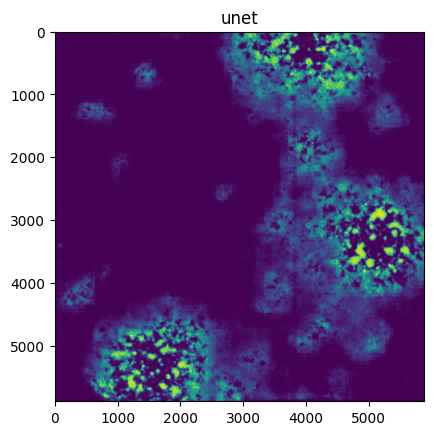

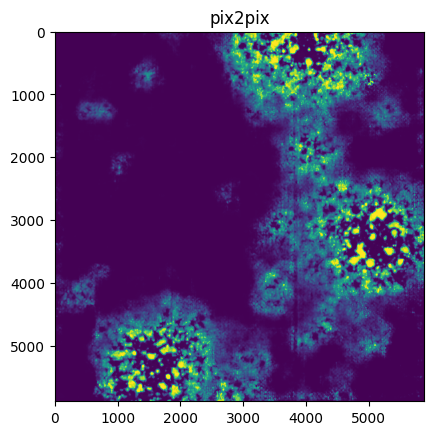

In [9]:
for virus in ["vacv"]:

    if "vacv" == virus:
        size = 5888
    else:
        size = 2048

    if "2ch" in virus:
        ch_in = [0, 1]
    else:
        ch_in = [0]
    if "hadv" in virus:
        i = 22
    elif "iav" in virus:
        i = 1
    else:
        i = 0
        
    dataloader = NpyDataloader(
        path=DATASETS[virus],
        im_size=size,
        random_jitter=False,
        crop_type="center",
        ch_in=ch_in,
    )

    x, y = dataloader[i]
 
#     plt.imshow(np.squeeze(y), vmin=-1, vmax=1)
#     plt.figure()

#     plt.imshow(np.squeeze(x[..., 0]), vmin=-1, vmax=1)
#     plt.figure()        
    
    for model in ["unet", "pix2pix"]:
        if model == "unet":
            dropout = False
        else:
            dropout = True
        generator = Generator(size, ch_in=ch_in, ch_out=1, apply_dropout=dropout)
        generator.load_weights(f"{BASE_PATH}/{WEIGHTS[model][virus]}")
        output = np.squeeze(generator(np.expand_dims(x, 0), training=True), 0)
        
        plt.figure()
        plt.imshow(np.squeeze(output), vmin=-1, vmax=1)
        plt.title(model)
        
        # plt.figure()
        # plt.axis('off')  # Turn off axes
        # plt.title("")  # Clear title
        # plt.imsave(f"{virus}_{model}_prediction.svg", np.squeeze(output), vmin=-1, vmax=1)
